In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

^ Torchvision is a helper package for loading common image datasets.

When using torchvision, you can specify transformations to perfrom on load using a `transformer`. These are created using the `transforms` module imported above.

Here we're going to normalize them.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Do a little inspection of the data

 bird horse  frog  deer


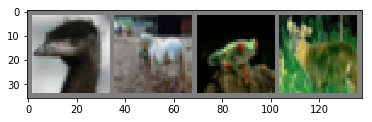

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.frame

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Our simple convnet

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Our simple loss function - SGD

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 
# ^ Remember, we pass our paramters to the optimizer directly

## Run a few loops of training

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.165
[1,  4000] loss: 1.870
[1,  6000] loss: 1.702
[1,  8000] loss: 1.599
[1, 10000] loss: 1.491
[1, 12000] loss: 1.423
[2,  2000] loss: 1.385
[2,  4000] loss: 1.334
[2,  6000] loss: 1.305
[2,  8000] loss: 1.264
[2, 10000] loss: 1.270
[2, 12000] loss: 1.258
Finished Training


### Pass some examples through

In [10]:
data_iter = iter(testloader)

Process Process-8:
Process Process-7:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.frame

In [12]:
images, labels = dataiter.next()

GroundTruth:    dog  deer plane  ship


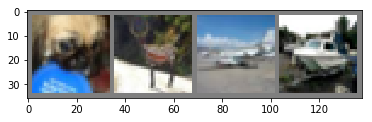

In [13]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
outputs = net(Variable(images))

In [18]:
print(outputs)

Variable containing:
-0.1929 -0.0427 -0.5580  1.8065 -1.3942  0.7525  1.0199 -1.2382 -0.1062  0.0627
-0.4713 -0.2703  0.7050  0.2842  3.2298 -0.1895  1.7206  0.2490 -3.0183 -2.2859
 3.9094 -0.2257  0.6848 -1.4313  0.7503 -2.0866 -2.9927 -0.2225  2.0354 -0.4627
 2.4144  6.0651 -2.1860 -2.1684 -4.0214 -3.5161 -3.5642 -2.8051  4.0113  4.1203
[torch.FloatTensor of size 4x10]



In [19]:
_, pred = torch.max(outputs.data, 1)

In [21]:
print('Predicted: ', ' '.join('%5s' % classes[pred[j]]
                              for j in range(4)))

Predicted:    cat  deer plane   car


## Assess over all data

In [22]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Which classess work well?

In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 74 %
Accuracy of  bird : 28 %
Accuracy of   cat : 18 %
Accuracy of  deer : 35 %
Accuracy of   dog : 27 %
Accuracy of  frog : 82 %
Accuracy of horse : 75 %
Accuracy of  ship : 64 %
Accuracy of truck : 74 %


# -- Here ends the PyTorch tutorial -- #
But as an extension: can we analyse the preferences of the different neurons in our network?

## Start with fully-connected layers, since that's easy

We're going to feed a bunch of examples of each class, record the activity of each neuron, then visualize in a matrix.

From the discussion [here](https://discuss.pytorch.org/t/how-to-extract-features-of-an-image-from-a-trained-model/119/5) it seems like this isn't going to be very easy post-hoc. 

The best thing is therefore to return the intermediate activations as part of the forward pass, and evaluate as is. We can then make a nice video of our neurons acquiring preferences, which would be cool.

In [26]:
net.fc1.float()

Linear (400 -> 120)

In [31]:
class transparent_Net(nn.Module):
    
    def __init__(self):
        super(transparent_Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x, store=False):
        """ Here we return the activations of all 
        the intermediate layers as well as the output of
        the final fully-connected layer."""
        
        activations = {}
        if store:
            activations['conv1']=F.relu(self.conv1(x))
        
        x = self.pool(F.relu(self.conv1(x)))
        
        if store:
            activations['pool1']: x
            activations['conv2']: F.relu(self.conv2(x))
                
        x = self.pool(F.relu(self.conv2(x)))
        
        if store:
            activations['conv2']: x
    
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        
        if store:
            activations['fc1']: x
        
        x = F.relu(self.fc2(x))
        
        if store:
            activations['fc2']: x
        
        x = self.fc3(x)
        
        if store:
            activations['fc3']: x
        
        return x, activations


t_net = transparent_Net()


In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(t_net.parameters(), lr=0.001, momentum=0.9) 

We have to redefine the test loader to get a single sample batch, otherwise our neuron activations are going to be averages. 

In [40]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)




In [44]:
activation_list = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        if i % 2000 == 1999:
            outputs, activations = t_net(inputs, store=True)
            activation_list.append({'epoch': epoch, 
                                   'i': i,
                                   'label': labels,
                                   'activations': activations})
        else:
            outputs, _ = t_net(inputs)
        
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.231
[1,  4000] loss: 2.021
[1,  6000] loss: 1.889
[1,  8000] loss: 1.819
[1, 10000] loss: 1.713
[1, 12000] loss: 1.731
[1, 14000] loss: 1.701
[1, 16000] loss: 1.670
[1, 18000] loss: 1.663


Process Process-25:
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process Process-26:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/local/lib/python3.6/site-packages/torch/utils/da

KeyboardInterrupt: 

  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
